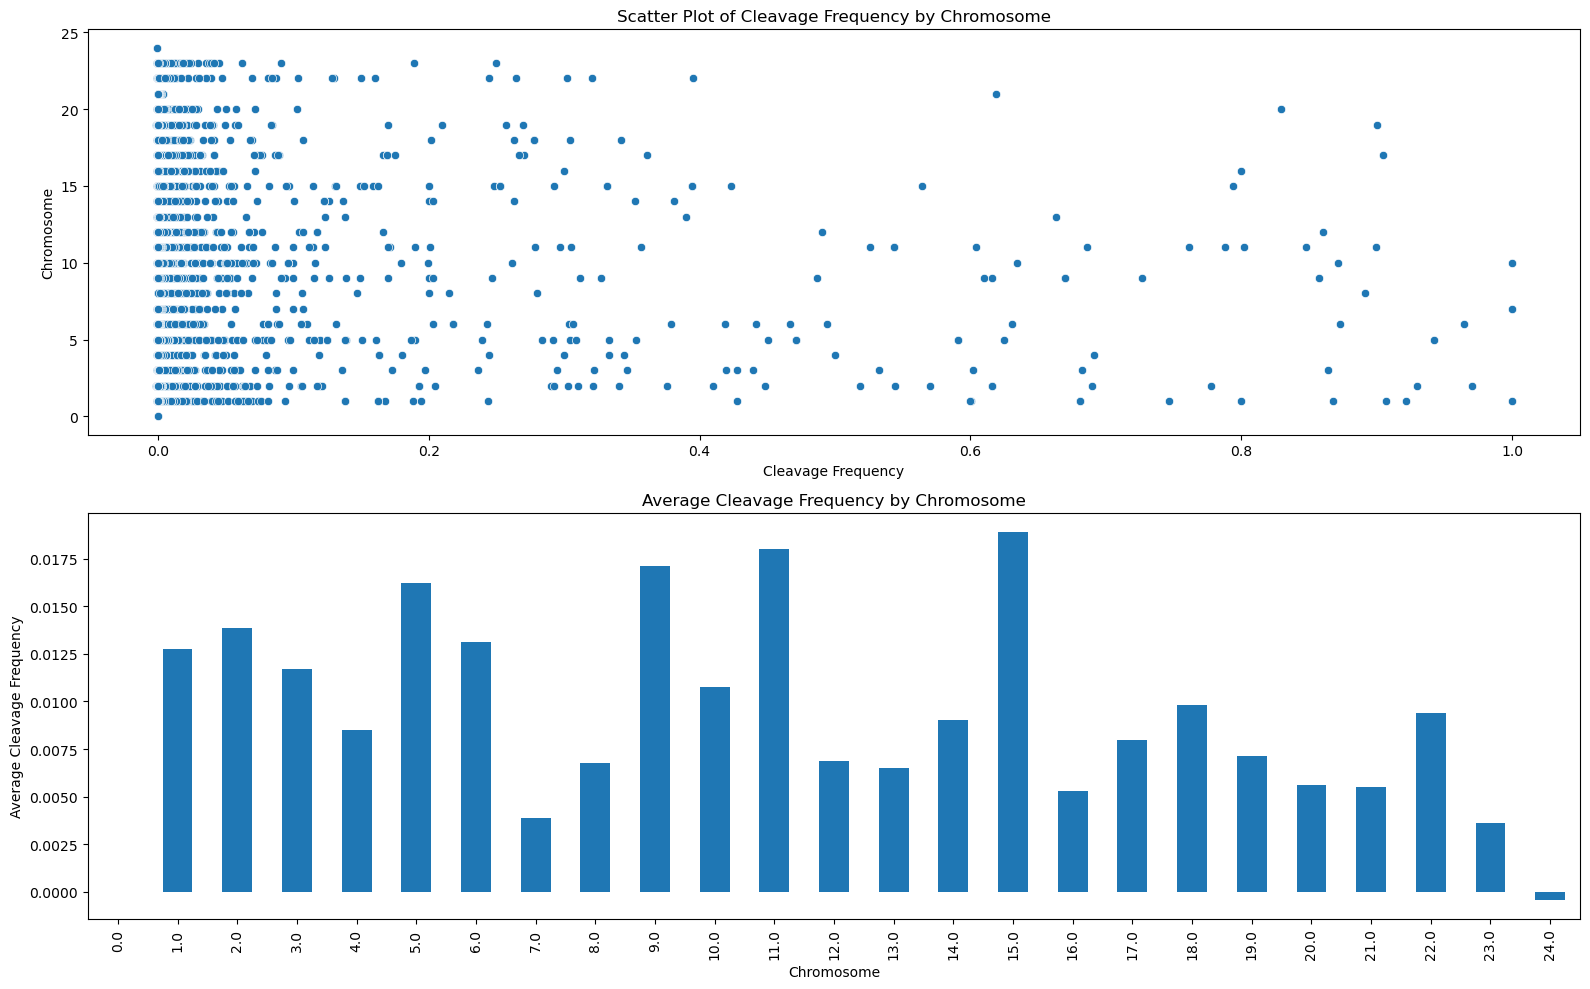

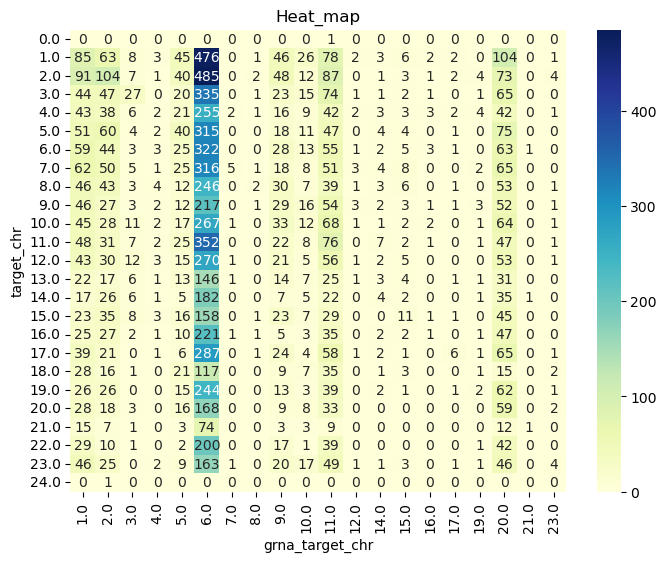

In [33]:
"""Cleavage Frequencies"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data from a CSV file into a DataFrame and specify the data type for the 'cleavage_freq' column
data = pd.read_csv('off_target_emily.csv', dtype={'cleavage_freq': float})

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Subplot 1: Scatter plot
sns.scatterplot(ax=axs[0], x='cleavage_freq', y='target_chr', data=data)
axs[0].set_xlabel('Cleavage Frequency')
axs[0].set_ylabel('Chromosome')
axs[0].set_title('Scatter Plot of Cleavage Frequency by Chromosome')

# Subplot 2: Bar plot for average cleavage frequency by chromosome
average_cleavage_freq_by_chromosome = data.groupby('target_chr')['cleavage_freq'].mean()
average_cleavage_freq_by_chromosome.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Chromosome')
axs[1].set_ylabel('Average Cleavage Frequency')
axs[1].set_title('Average Cleavage Frequency by Chromosome')

# Adjust layout
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
fig.savefig('cleavage_frequencies.png')

# Show the plots
plt.show()

"""Heat Map"""
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table to analyze the correlation
contingency_table = pd.crosstab(data['target_chr'], data['grna_target_chr'])

# Calculate the Cramer's V coefficient for categorical data
chi2, p, _, _ = chi2_contingency(contingency_table)
n = np.sum(contingency_table)
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

# Visualize the correlation coefficient
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heat_map") 
plt.xlabel('grna_target_chr')
plt.ylabel('target_chr')

# Save the heatmap figure as an image file (e.g., PNG)
plt.savefig('heat_map.png')

# Show the plot
plt.show()


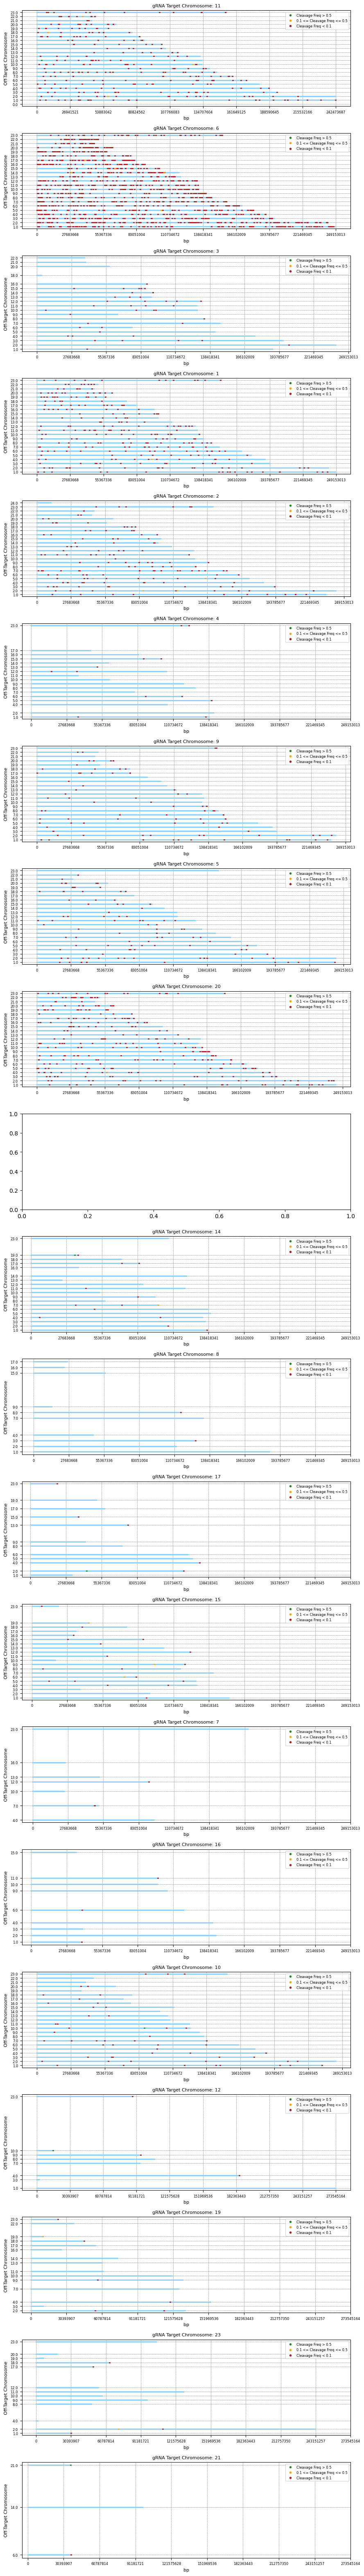

In [29]:
"""Cleavage Location on Chromosomes"""
import matplotlib.pyplot as plt
import pandas as pd

csv = pd.read_csv('off_target_emily.csv')

grna_unique = csv['grna_target_chr'].unique()

# Initialize max_chrome_max to track the maximum value across all subplots
max_chrome_max = 0

fig, axes = plt.subplots(len(grna_unique), 1, figsize=(9, 3 * len(grna_unique)))

# Define labels for legend
legend_labels = {'forestgreen': 'Cleavage Freq > 0.5',
                 'orange': '0.1 <= Cleavage Freq <= 0.5',
                 'firebrick': 'Cleavage Freq < 0.1'}

for plot_number, grna_target_chr in enumerate(grna_unique):
    data = csv[csv['grna_target_chr'] == grna_target_chr].dropna()

    if not data.empty:
        unique_ticks = data['target_chr'].unique()

        for target_chr in unique_ticks:
            chrome_max = data[data['target_chr'] == target_chr]['target_end'].max()
            max_chrome_max = max(max_chrome_max, chrome_max)

            axes[plot_number].plot([0, chrome_max], [target_chr, target_chr], color='lightskyblue', linewidth=2, zorder=2)

            target_data = data[data['target_chr'] == target_chr]
            for _, row in target_data.iterrows():
                target_end = row['target_end']
                target_start = row['target_start']

                # Add color-coding based on cleavage_freq
                cleavage_freq = row['cleavage_freq']
                if cleavage_freq > 0.5:
                    color = 'forestgreen'
                elif 0.1 <= cleavage_freq <= 0.5:
                    color = 'orange'
                else:
                    color = 'firebrick'

                axes[plot_number].plot([target_start - 100000, target_end], [target_chr, target_chr], color=color, linewidth=2, zorder=3)

            axes[plot_number].set_yticks(unique_ticks)
            axes[plot_number].set_yticklabels([f'{tick:.1f}' for tick in unique_ticks], fontsize=6)  # Adjust font size for y-axis ticks
            axes[plot_number].set_ylim(min(unique_ticks) - 0.5, max(unique_ticks) + 0.5)
            # Format gRNA Target Chromosome as an integer and then as a string
            formatted_chr = int(grna_target_chr)
            axes[plot_number].set_title(f'gRNA Target Chromosome: {formatted_chr}', fontsize=8)

            # Set y-axis label
            axes[plot_number].set_ylabel('Off-Target Chromosome', fontsize=8)

            # Add a gray grid
            axes[plot_number].grid(color='gray', linestyle='--', linewidth=0.5, zorder=1)

        # Set x-axis ticks and label for each subplot
        num_ticks = 10  # Adjust the number of ticks as needed
        x_ticks = [i * max_chrome_max / (num_ticks - 1) for i in range(num_ticks)]
        axes[plot_number].set_xticks(x_ticks)
        axes[plot_number].set_xticklabels([f'{tick:.0f}' for tick in x_ticks], fontsize=6)  # Adjust font size for x-axis ticks
        axes[plot_number].set_xlabel('bp', fontsize=8)  # Add x-axis label

        # Add legend to each subplot at the top right
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=5) for color, label in legend_labels.items()]
        axes[plot_number].legend(handles=legend_elements, loc='upper right', fontsize=6)

fig.tight_layout()

# Save the figure as an image file (e.g., PNG)
fig.savefig('off_target_plots.png')

plt.show()
